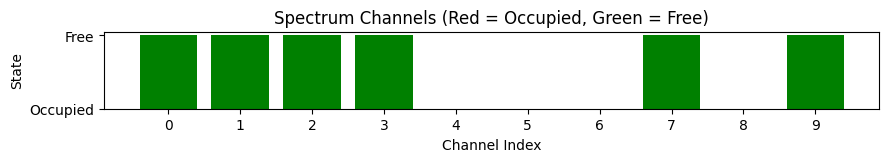

Step: 1, Action: 2, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 9}


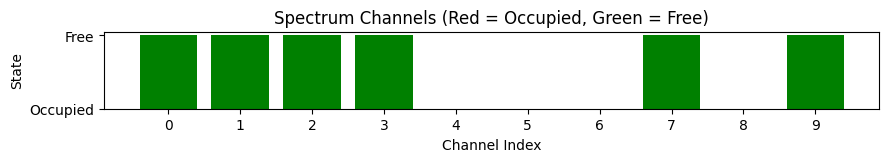

Step: 2, Action: 7, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 8}


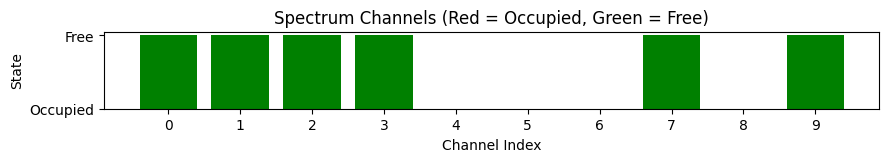

Step: 3, Action: 4, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 7}


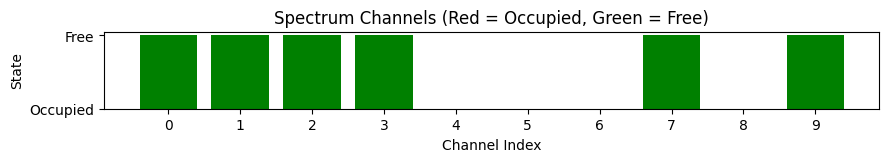

Step: 4, Action: 3, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 6}


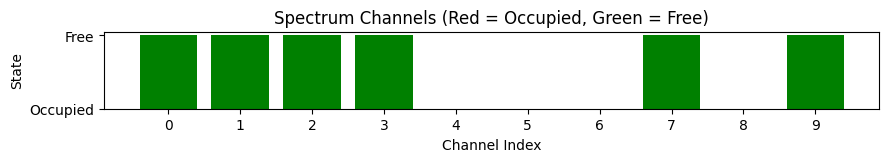

Step: 5, Action: 8, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 5}


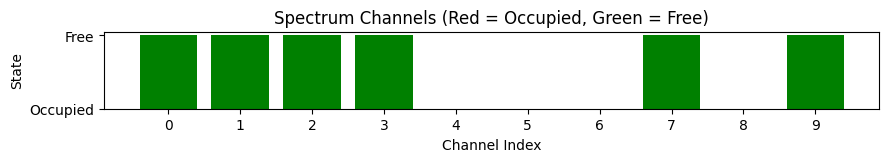

Step: 6, Action: 2, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 4}


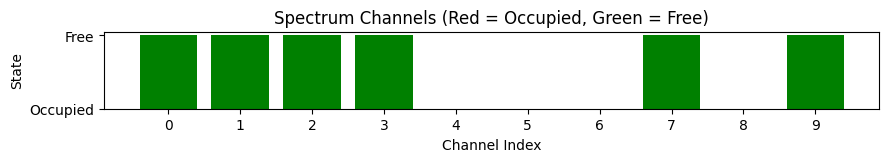

Step: 7, Action: 0, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 3}


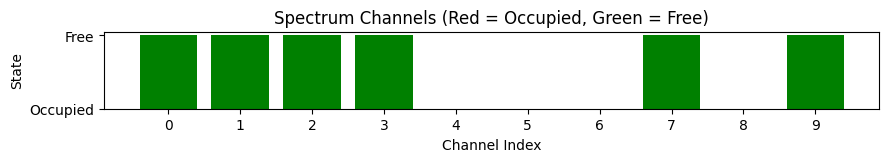

Step: 8, Action: 3, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 2}


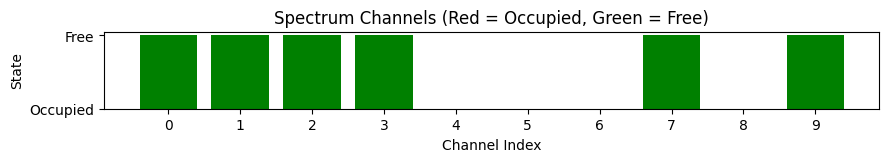

Step: 9, Action: 8, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 1}


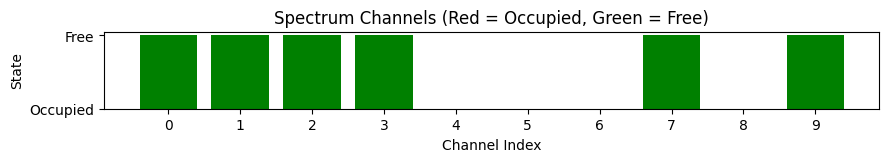

Step: 10, Action: 2, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 0}


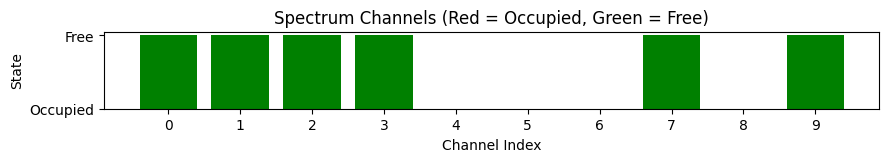

Total Reward: 54.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SpectrumEnv:
    def __init__(self, num_channels=10, max_steps=50):
        """
        Custom environment for spectrum hole detection without external libraries.
        :param num_channels: Number of spectrum channels to monitor.
        :param max_steps: Maximum steps per episode.
        """
        self.num_channels = num_channels
        self.max_steps = max_steps
        
        # Energy cost parameters
        self.energy_per_action = 1.0  # Energy consumed per sensing action
        self.penalty_for_wrong_detection = 2.0  # Penalty for selecting an occupied channel
        
        # Reward configuration
        self.reward_for_detection = 10.0  # Reward for correctly detecting a free channel
        
        # Internal state variables
        self.state = None
        self.current_step = 0
        self.done = False
    
    def reset(self):
        """
        Reset the environment to its initial state.
        """
        self.state = np.random.choice([0, 1], size=(self.num_channels,), p=[0.5, 0.5])
        self.current_step = 0
        self.done = False
        return self.state
    
    def step(self, action):
        """
        Execute an action in the environment.
        :param action: The channel chosen for sensing (integer index).
        :return: observation (state), reward, done, info
        """
        if self.done:
            raise ValueError("Episode has ended. Please reset the environment.")
        
        # Increment step count
        self.current_step += 1
        if self.current_step >= self.max_steps:
            self.done = True
        
        # Calculate reward
        if self.state[action] == 1:  # Correct detection
            reward = self.reward_for_detection - self.energy_per_action
        else:  # Incorrect detection
            reward = -self.penalty_for_wrong_detection - self.energy_per_action
        
        # Info dictionary
        info = {
            "energy_consumed": self.energy_per_action,
            "steps_remaining": self.max_steps - self.current_step
        }
        
        return self.state, reward, self.done, info
    
    def render(self):
        """
        Render the environment by displaying the state of channels.
        """
        plt.figure(figsize=(10, 1))
        plt.clf()
        plt.bar(range(self.num_channels), self.state, color=['red' if x == 0 else 'green' for x in self.state])
        plt.title("Spectrum Channels (Red = Occupied, Green = Free)")
        plt.xlabel("Channel Index")
        plt.ylabel("State")
        plt.xticks(range(self.num_channels))
        plt.yticks([0, 1], ["Occupied", "Free"])
        plt.show()

# Example usage
if __name__ == "__main__":
    # Initialize environment
    env = SpectrumEnv(num_channels=10, max_steps=10)
    
    # Reset the environment
    state = env.reset()
    env.render()
    
    total_reward = 0
    while not env.done:
        # Random action selection
        action = np.random.randint(0, env.num_channels)
        state, reward, done, info = env.step(action)
        print(f"Step: {env.current_step}, Action: {action}, Reward: {reward}, Info: {info}")
        total_reward += reward
        env.render()
    
    print(f"Total Reward: {total_reward}")


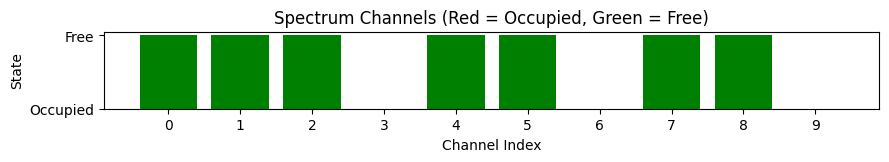

Step: 1, Action: 1, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 9}


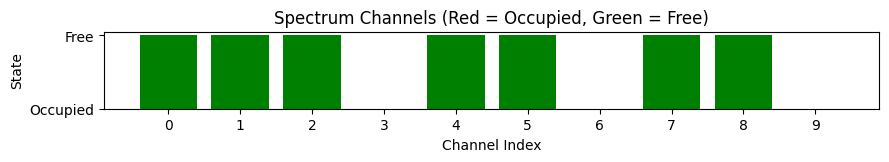

Step: 2, Action: 7, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 8}


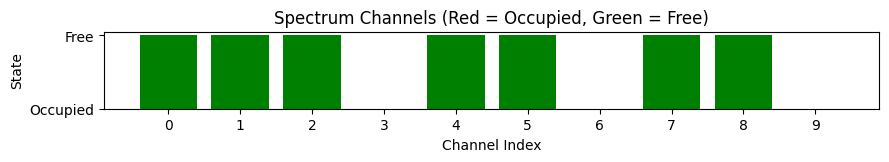

Step: 3, Action: 1, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 7}


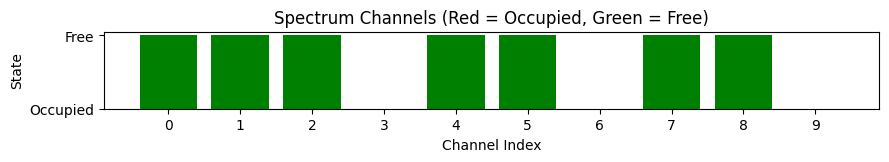

Step: 4, Action: 8, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 6}


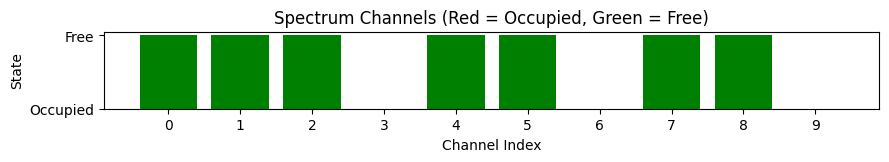

Step: 5, Action: 1, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 5}


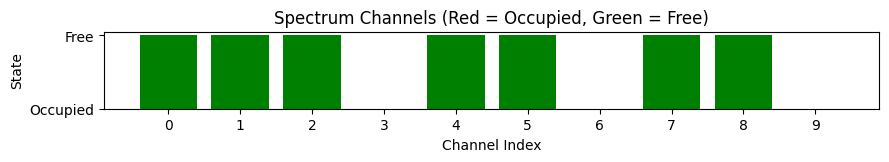

Step: 6, Action: 2, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 4}


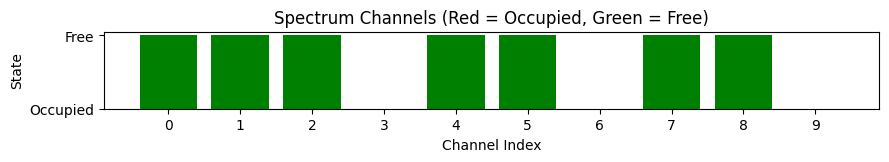

Step: 7, Action: 1, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 3}


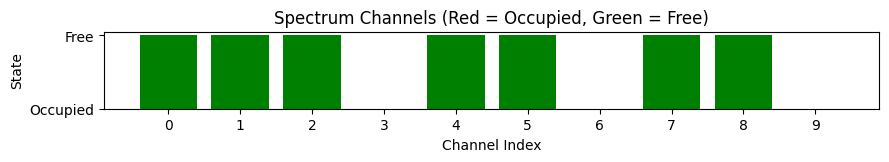

Step: 8, Action: 1, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 2}


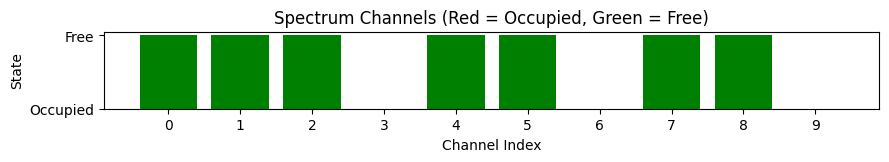

Step: 9, Action: 6, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 1}


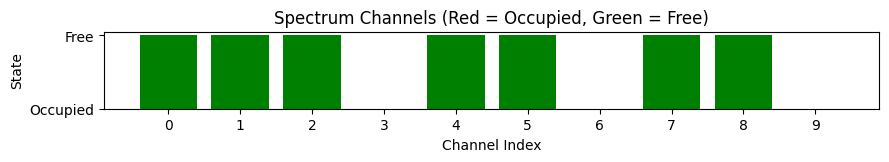

Step: 10, Action: 4, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 0}


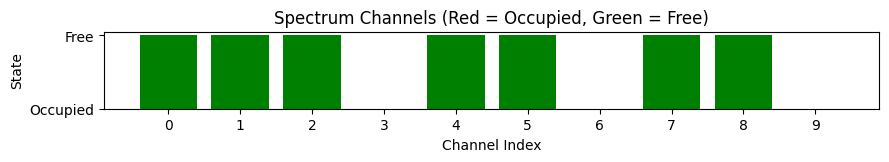

Total Reward: 78.0


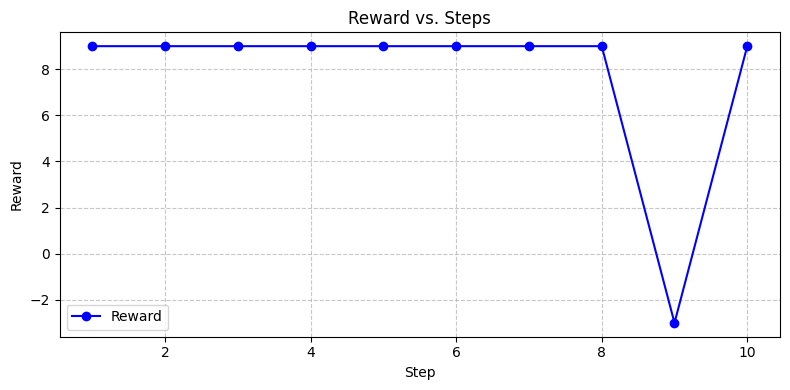

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SpectrumEnv:
    def __init__(self, num_channels=10, max_steps=50):
        """
        Custom environment for spectrum hole detection without external libraries.
        :param num_channels: Number of spectrum channels to monitor.
        :param max_steps: Maximum steps per episode.
        """
        self.num_channels = num_channels
        self.max_steps = max_steps
        
        # Energy cost parameters
        self.energy_per_action = 1.0  # Energy consumed per sensing action
        self.penalty_for_wrong_detection = 2.0  # Penalty for selecting an occupied channel
        
        # Reward configuration
        self.reward_for_detection = 10.0  # Reward for correctly detecting a free channel
        
        # Internal state variables
        self.state = None
        self.current_step = 0
        self.done = False
    
    def reset(self):
        """
        Reset the environment to its initial state.
        """
        self.state = np.random.choice([0, 1], size=(self.num_channels,), p=[0.5, 0.5])
        self.current_step = 0
        self.done = False
        return self.state
    
    def step(self, action):
        """
        Execute an action in the environment.
        :param action: The channel chosen for sensing (integer index).
        :return: observation (state), reward, done, info
        """
        if self.done:
            raise ValueError("Episode has ended. Please reset the environment.")
        
        # Increment step count
        self.current_step += 1
        if self.current_step >= self.max_steps:
            self.done = True
        
        # Calculate reward
        if self.state[action] == 1:  # Correct detection
            reward = self.reward_for_detection - self.energy_per_action
        else:  # Incorrect detection
            reward = -self.penalty_for_wrong_detection - self.energy_per_action
        
        # Info dictionary
        info = {
            "energy_consumed": self.energy_per_action,
            "steps_remaining": self.max_steps - self.current_step
        }
        
        return self.state, reward, self.done, info
    
    def render(self):
        """
        Render the environment by displaying the state of channels.
        """
        plt.figure(figsize=(10, 1))
        plt.clf()
        plt.bar(range(self.num_channels), self.state, color=['red' if x == 0 else 'green' for x in self.state])
        plt.title("Spectrum Channels (Red = Occupied, Green = Free)")
        plt.xlabel("Channel Index")
        plt.ylabel("State")
        plt.xticks(range(self.num_channels))
        plt.yticks([0, 1], ["Occupied", "Free"])
        plt.show()

# Example usage
if __name__ == "__main__":
    # Initialize environment
    env = SpectrumEnv(num_channels=10, max_steps=10)
    
    # Reset the environment
    state = env.reset()
    env.render()
    
    rewards = []  # List to store rewards at each step
    total_reward = 0
    while not env.done:
        # Random action selection
        action = np.random.randint(0, env.num_channels)
        state, reward, done, info = env.step(action)
        rewards.append(reward)
        print(f"Step: {env.current_step}, Action: {action}, Reward: {reward}, Info: {info}")
        total_reward += reward
        env.render()
    
    print(f"Total Reward: {total_reward}")
    
    # Plot the reward over steps
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(rewards) + 1), rewards, marker='o', linestyle='-', color='blue', label='Reward')
    plt.title("Reward vs. Steps")
    plt.xlabel("Step")
    plt.ylabel("Reward")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


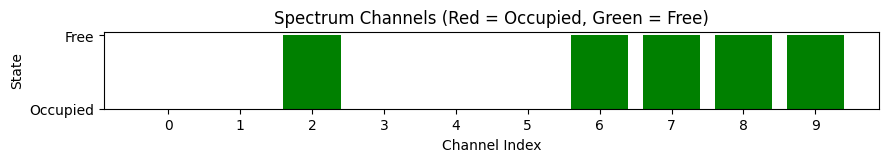

Step: 1, Action: 9, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 9}


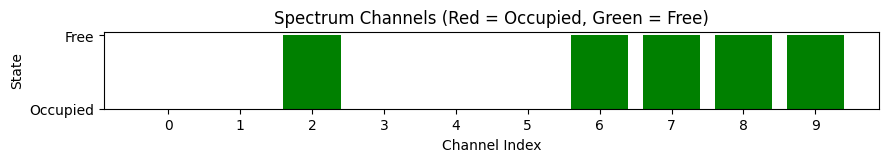

Step: 2, Action: 5, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 8}


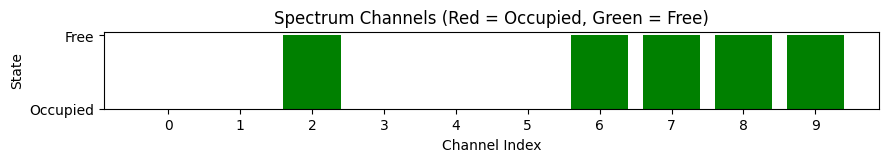

Step: 3, Action: 8, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 7}


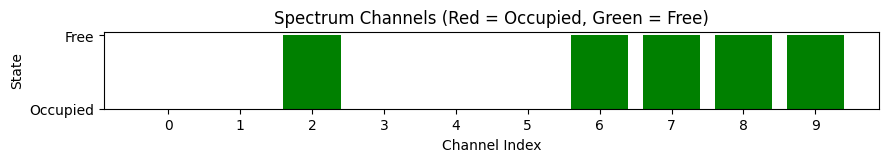

Step: 4, Action: 1, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 6}


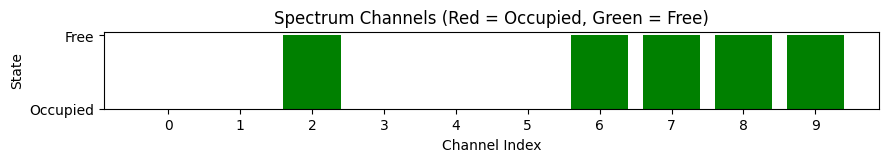

Step: 5, Action: 9, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 5}


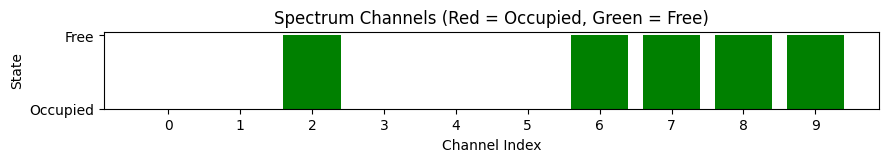

Step: 6, Action: 0, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 4}


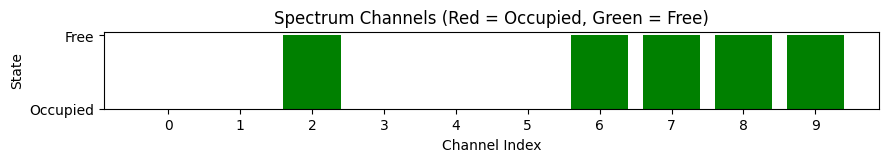

Step: 7, Action: 1, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 3}


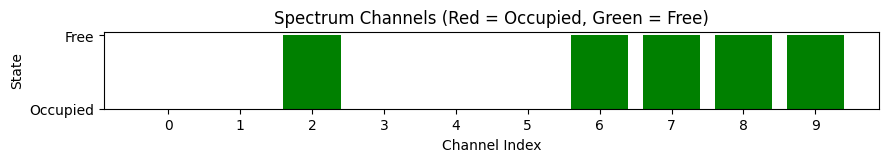

Step: 8, Action: 3, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 2}


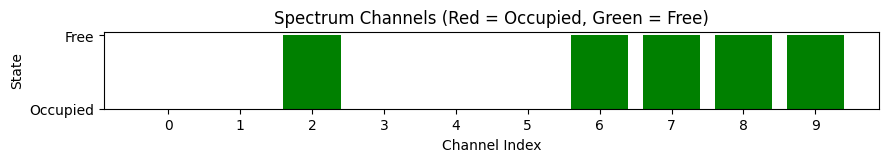

Step: 9, Action: 5, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 1}


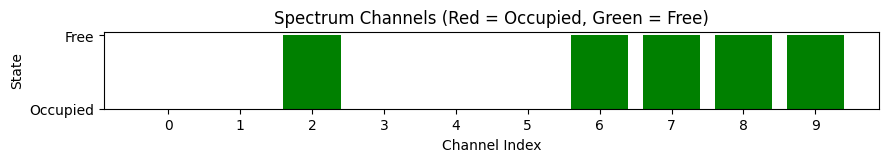

Step: 10, Action: 7, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 0}


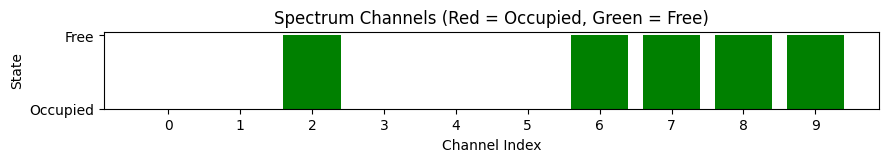

Total Reward: 18.0


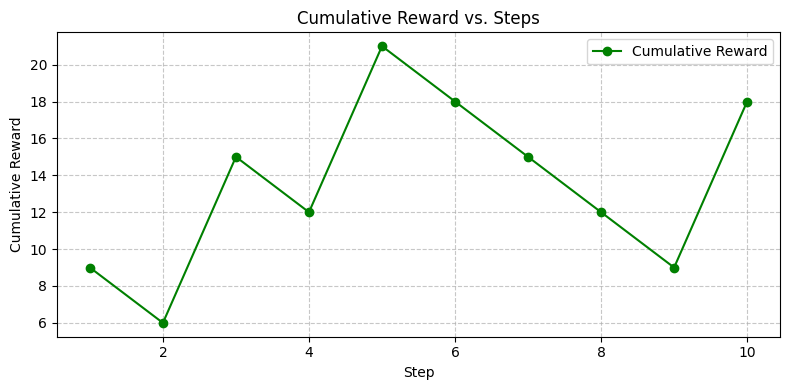

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class SpectrumEnv:
    def __init__(self, num_channels=10, max_steps=50):
        """
        Custom environment for spectrum hole detection without external libraries.
        :param num_channels: Number of spectrum channels to monitor.
        :param max_steps: Maximum steps per episode.
        """
        self.num_channels = num_channels
        self.max_steps = max_steps
        
        # Energy cost parameters
        self.energy_per_action = 1.0  # Energy consumed per sensing action
        self.penalty_for_wrong_detection = 2.0  # Penalty for selecting an occupied channel
        
        # Reward configuration
        self.reward_for_detection = 10.0  # Reward for correctly detecting a free channel
        
        # Internal state variables
        self.state = None
        self.current_step = 0
        self.done = False
    
    def reset(self):
        """
        Reset the environment to its initial state.
        """
        self.state = np.random.choice([0, 1], size=(self.num_channels,), p=[0.5, 0.5])
        self.current_step = 0
        self.done = False
        return self.state
    
    def step(self, action):
        """
        Execute an action in the environment.
        :param action: The channel chosen for sensing (integer index).
        :return: observation (state), reward, done, info
        """
        if self.done:
            raise ValueError("Episode has ended. Please reset the environment.")
        
        # Increment step count
        self.current_step += 1
        if self.current_step >= self.max_steps:
            self.done = True
        
        # Calculate reward
        if self.state[action] == 1:  # Correct detection
            reward = self.reward_for_detection - self.energy_per_action
        else:  # Incorrect detection
            reward = -self.penalty_for_wrong_detection - self.energy_per_action
        
        # Info dictionary
        info = {
            "energy_consumed": self.energy_per_action,
            "steps_remaining": self.max_steps - self.current_step
        }
        
        return self.state, reward, self.done, info
    
    def render(self):
        """
        Render the environment by displaying the state of channels.
        """
        plt.figure(figsize=(10, 1))
        plt.clf()
        plt.bar(range(self.num_channels), self.state, color=['red' if x == 0 else 'green' for x in self.state])
        plt.title("Spectrum Channels (Red = Occupied, Green = Free)")
        plt.xlabel("Channel Index")
        plt.ylabel("State")
        plt.xticks(range(self.num_channels))
        plt.yticks([0, 1], ["Occupied", "Free"])
        plt.show()

# Example usage
if __name__ == "__main__":
    # Initialize environment
    env = SpectrumEnv(num_channels=10, max_steps=10)
    
    # Reset the environment
    state = env.reset()
    env.render()
    
    rewards = []  # List to store rewards at each step
    cumulative_rewards = []  # List to store cumulative rewards
    total_reward = 0
    while not env.done:
        # Random action selection
        action = np.random.randint(0, env.num_channels)
        state, reward, done, info = env.step(action)
        total_reward += reward
        rewards.append(reward)
        cumulative_rewards.append(total_reward)  # Update cumulative reward
        print(f"Step: {env.current_step}, Action: {action}, Reward: {reward}, Info: {info}")
        env.render()
    
    print(f"Total Reward: {total_reward}")
    
    # Plot the cumulative reward over steps
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, marker='o', linestyle='-', color='green', label='Cumulative Reward')
    plt.title("Cumulative Reward vs. Steps")
    plt.xlabel("Step")
    plt.ylabel("Cumulative Reward")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_connection = full_nodirect;
	if not, set initial_connection = full_direct
	if this is desired, set initial_conn


 ****** Running generation 0 ****** 

Population's average fitness: 75.60000 stdev: 110.84909
Best fitness: 180.00000 - size: (15, 105) - species 1 - id 3

Best individual in generation 0 meets fitness threshold - complexity: (15, 105)

Best Genome:
 Key: 3
Fitness: 180.0
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.0941779718437241, response=1.0, activation=tanh, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=0.7209804409323093, response=1.0, activation=tanh, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=-0.5939160029209143, response=1.0, activation=tanh, aggregation=sum)
	3 DefaultNodeGene(key=3, bias=-0.18352255145863688, response=1.0, activation=tanh, aggregation=sum)
	4 DefaultNodeGene(key=4, bias=1.841994602591153, response=1.0, activation=tanh, aggregation=sum)
	5 DefaultNodeGene(key=5, bias=-0.5343163873762259, response=1.0, activation=tanh, aggregation=sum)
	6 DefaultNodeGene(key=6, bias=-0.8834564787672574, response=1.0, activation=tanh, aggregation=sum)
	7 DefaultNodeGene(ke

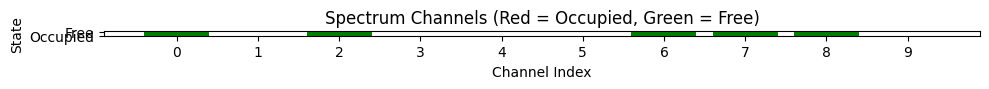

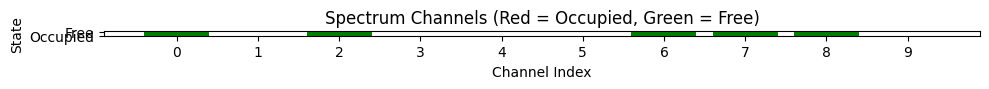

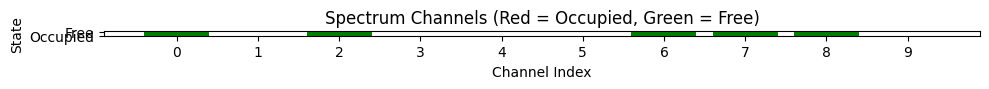

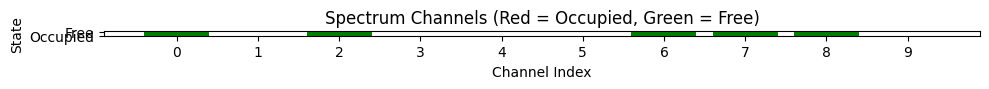

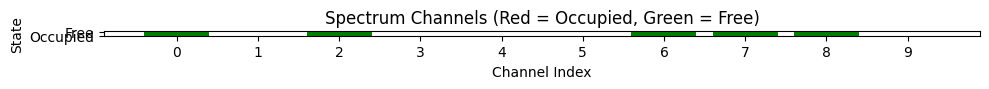

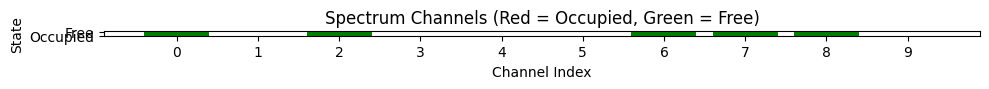

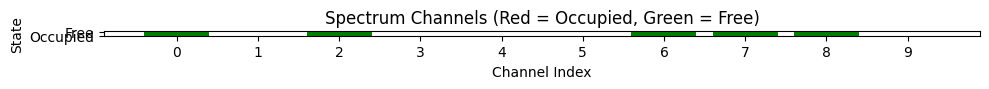

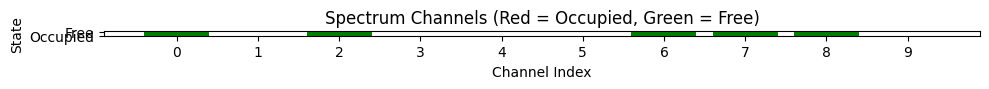

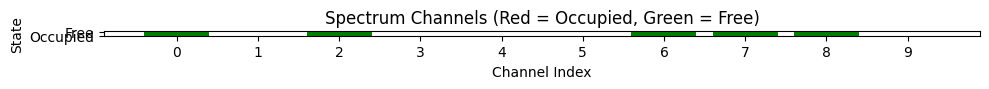

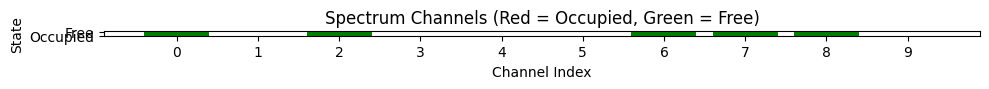

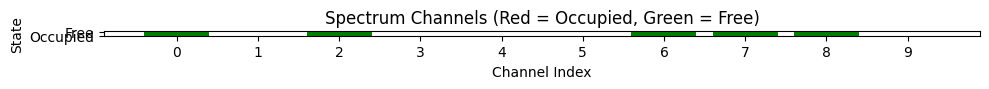

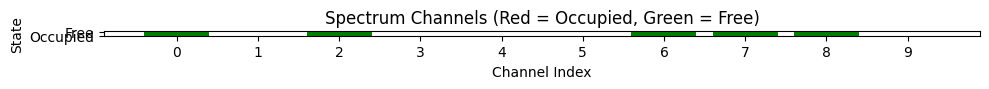

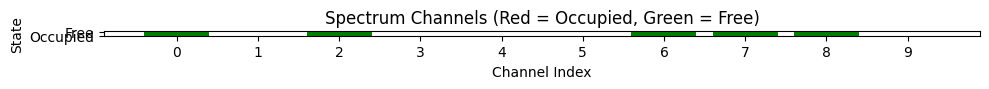

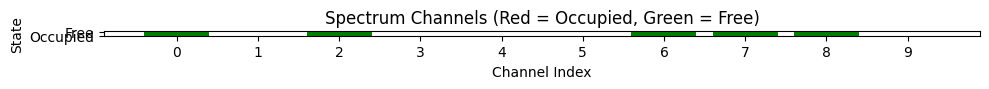

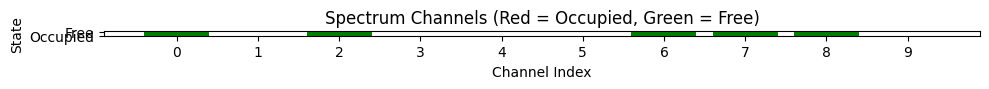

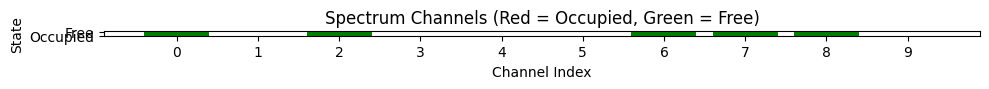

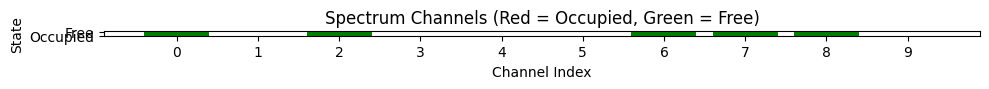

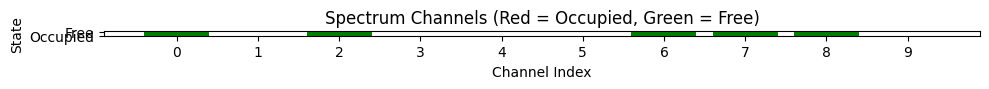

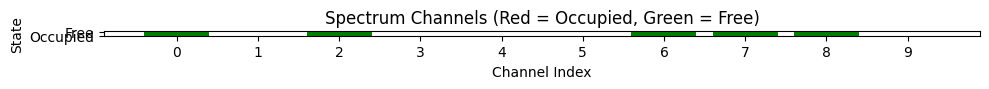

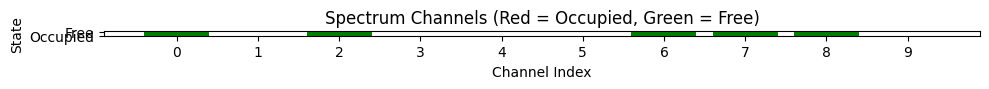

Total Reward from Best Genome: 180.0


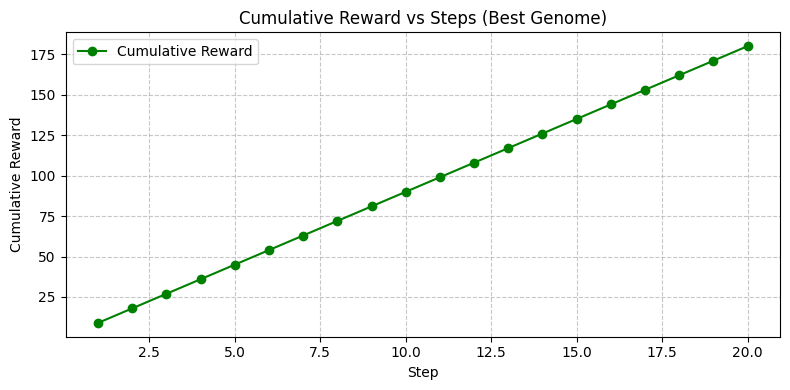

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import neat

class SpectrumEnv:
    def __init__(self, num_channels=10, max_steps=50):
        """
        Custom environment for spectrum hole detection without external libraries.
        :param num_channels: Number of spectrum channels to monitor.
        :param max_steps: Maximum steps per episode.
        """
        self.num_channels = num_channels
        self.max_steps = max_steps
        
        # Energy cost parameters
        self.energy_per_action = 1.0  # Energy consumed per sensing action
        self.penalty_for_wrong_detection = 2.0  # Penalty for selecting an occupied channel
        self.reward_for_detection = 10.0  # Reward for correctly detecting a free channel
        
        self.state = None
        self.current_step = 0
        self.done = False
    
    def reset(self):
        """
        Reset the environment to its initial state.
        """
        self.state = np.random.choice([0, 1], size=(self.num_channels,), p=[0.5, 0.5])
        self.current_step = 0
        self.done = False
        return self.state
    
    def step(self, action):
        """
        Execute an action in the environment.
        :param action: The channel chosen for sensing (integer index).
        :return: observation (state), reward, done, info
        """
        if self.done:
            raise ValueError("Episode has ended. Please reset the environment.")
        
        self.current_step += 1
        if self.current_step >= self.max_steps:
            self.done = True
        
        # Calculate reward
        if self.state[action] == 1:
            reward = self.reward_for_detection - self.energy_per_action
        else:
            reward = -self.penalty_for_wrong_detection - self.energy_per_action
        
        info = {
            "energy_consumed": self.energy_per_action,
            "steps_remaining": self.max_steps - self.current_step
        }
        return self.state, reward, self.done, info
    
    def render(self):
        """
        Render the environment by displaying the state of channels.
        """
        plt.figure(figsize=(10, 1))
        plt.clf()
        plt.bar(range(self.num_channels), self.state, color=['red' if x == 0 else 'green' for x in self.state])
        plt.title("Spectrum Channels (Red = Occupied, Green = Free)")
        plt.xlabel("Channel Index")
        plt.ylabel("State")
        plt.xticks(range(self.num_channels))
        plt.yticks([0, 1], ["Occupied", "Free"])
        plt.tight_layout()
        plt.show()

# NEAT Fitness Function
def evaluate_genomes(genomes, config):
    env = SpectrumEnv(num_channels=10, max_steps=20)
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        state = env.reset()
        total_reward = 0
        
        while not env.done:
            # Input features for NEAT (channel state + current step / max steps for normalization)
            inputs = list(state) + [env.current_step / env.max_steps]
            # Predict the next action
            outputs = net.activate(inputs)
            action = int(np.argmax(outputs))  # Choose the channel with the highest output value
            
            # Execute the action
            state, reward, done, info = env.step(action)
            total_reward += reward
        
        # Assign the fitness score as the total reward
        genome.fitness = total_reward

# NEAT Configuration
def run_neat():
    # Load the NEAT configuration
    config_path = "config-feedforward"
    config = neat.config.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path
    )
    
    # Create the NEAT population
    population = neat.Population(config)
    
    # Add reporters to keep track of progress
    population.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    population.add_reporter(stats)
    
    # Run NEAT for a specified number of generations
    winner = population.run(evaluate_genomes, n=50)
    
    # Display the best genome
    print("\nBest Genome:\n", winner)
    
    # Test the best genome
    test_winner(winner, config)

# Test the Best Genome
def test_winner(winner, config):
    env = SpectrumEnv(num_channels=10, max_steps=20)
    net = neat.nn.FeedForwardNetwork.create(winner, config)
    state = env.reset()
    total_reward = 0
    cumulative_rewards = []

    while not env.done:
        inputs = list(state) + [env.current_step / env.max_steps]
        outputs = net.activate(inputs)
        action = int(np.argmax(outputs))  # Choose the channel with the highest output value
        state, reward, done, info = env.step(action)
        total_reward += reward
        cumulative_rewards.append(total_reward)
        env.render()
    
    print(f"Total Reward from Best Genome: {total_reward}")
    
    # Plot cumulative rewards
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(cumulative_rewards) + 1), cumulative_rewards, marker='o', color='green', label='Cumulative Reward')
    plt.title("Cumulative Reward vs Steps (Best Genome)")
    plt.xlabel("Step")
    plt.ylabel("Cumulative Reward")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    run_neat()
